<a href="https://colab.research.google.com/github/NikolSkvarilova/Machine-Learning-Basics/blob/main/Linear_Regression_le_grand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent le grand 

In [ ]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [ ]:
# some totally random data
# let's predict the height of someone based on his/her weight

# generating the data
size = 250
heights = np.random.randint(150,200, size=size)
weights = heights - 100 
random_k = np.random.randint(-15,15, size=size)
weights += random_k

Text(0.5, 1.0, 'Data for the model to train on')

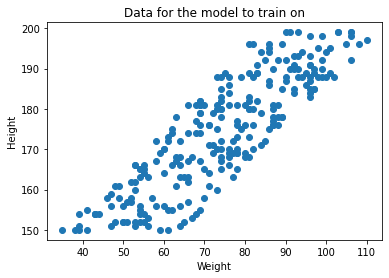

In [ ]:
# plotting the data
plt.plot(weights, heights, 'o')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Data for the model to train on")

In [ ]:
#normalizing the data
def normalize_array_0_1(arr):
  return (arr - np.min(arr))/np.ptp(arr)

weights = normalize_array_0_1(weights)
heights = normalize_array_0_1(heights)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'ssr')

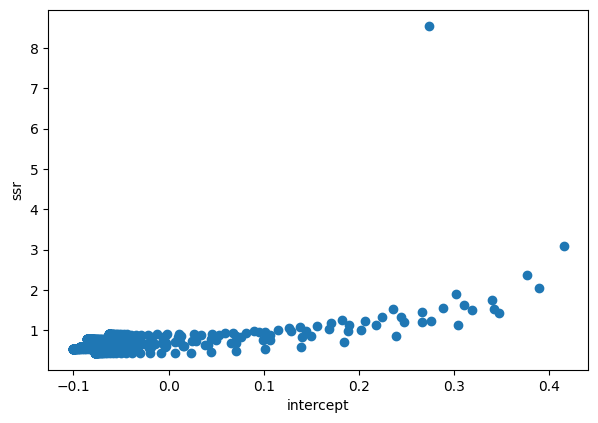

In [ ]:
from random import randrange

# we will use the standard linear model
# height = width * slope + intercept
# we will set the slope to be some arbitrary value
# and the goal is going to be to compute the intercept
# the loss function is going to be SSR: (observed - predicted)^2

batch_size = 30
learning_rate = 0.01
step_size_intercept = 1
step_size_slope= 1
intercept = 0
slope = 0
list_of_intercepts = []
list_of_slopes = []
list_of_ssr = []
r = 0
epochs = 50
mean_ssr = []

# while ((step_size_intercept > 0.0001 or step_size_intercept < -0.0001) and (step_size_slope > 0.0001 or step_size_slope < -0.0001)) or r > 10000:
for e in range(epochs):
  mean_ssr.append(np.mean(list_of_ssr))
  for r in range(0,size-batch_size,batch_size):
    ssr = 0
    step_size_intercept = 0
    step_size_slope = 0
    for i in range(batch_size):
      random_index = r+i
      ssr += (heights[random_index] - (intercept + weights[random_index] * slope)) ** 2
      # now the derivation
      step_size_intercept += (-2) * (heights[random_index] - (intercept + weights[random_index] * slope))
      step_size_slope += (-2) * (weights[random_index]) * (heights[random_index] - (slope * weights[random_index] + intercept))
    step_size_intercept *= learning_rate
    step_size_slope *= learning_rate
    intercept -= step_size_intercept
    slope -= step_size_slope
    list_of_intercepts.append(intercept)
    list_of_slopes.append(slope)
    list_of_ssr.append(ssr)


  
# visualizing the data
fig = plt.figure(figsize=(6,4), dpi=100)
axes = fig.add_axes([0.1,0.1,0.9,0.9])
axes.plot(list_of_intercepts, list_of_ssr, "o")
axes.set_xlabel("intercept")
axes.set_ylabel("ssr")

Text(0, 0.5, 'ssr')

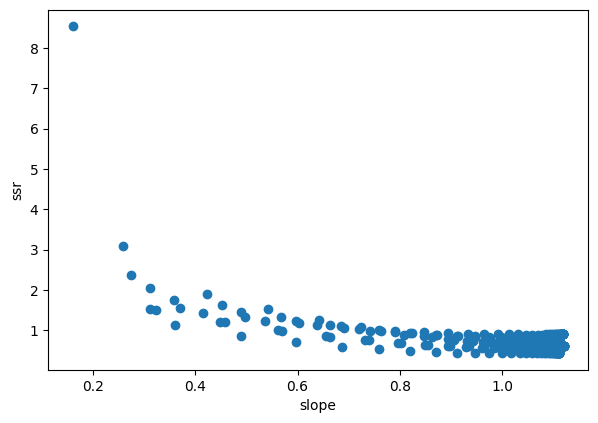

In [ ]:
fig2 = plt.figure(figsize=(6,4), dpi=100)
axes2 = fig2.add_axes([0.1,0.1,0.9,0.9])
axes2.plot(list_of_slopes, list_of_ssr, "o")
axes2.set_xlabel("slope")
axes2.set_ylabel("ssr")

Text(0, 0.5, 'height')

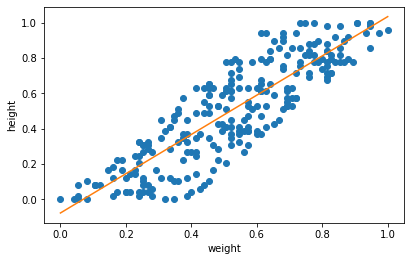

In [ ]:
fig1 = plt.figure(figsize=(5,3))
axes1 = fig1.add_axes([0,0,1,1])
axes1.plot(weights, heights, 'o')

#the line is y = m*x + b
x = np.array([0,1])
y =  x * slope + intercept

axes1.plot(x,y)
axes1.set_xlabel("weight")
axes1.set_ylabel("height")

#Tensorflow version

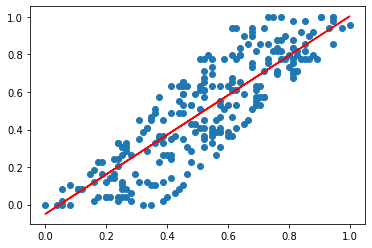

In [ ]:
import tensorflow as tf

weight = tf.Variable(0.)
bias = tf.Variable(0.)

def linreg(x):
  y = weight*x + bias
  return y

def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

x_train = weights
y_train = heights
training_epochs = 50
learning_rate = 0.7

# train model
for epoch in range(training_epochs):

  # Compute loss within Gradient Tape context
  with tf.GradientTape() as tape:
    y_predicted = linreg(x_train)
    loss = squared_error(y_predicted, y_train)

    # Get gradients
    gradients = tape.gradient(loss, [weight,bias])

  # Adjust weights
  weight.assign_sub(gradients[0]*learning_rate)
  bias.assign_sub(gradients[1]*learning_rate)

plt.scatter(x_train, y_train)
plt.plot(x_train, linreg(x_train), 'r')
plt.show()

Text(0, 0.5, 'mean ssr')

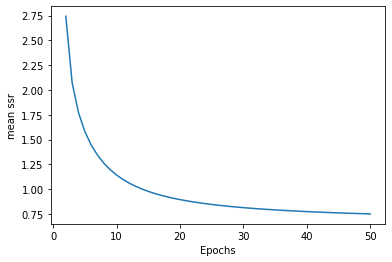

In [ ]:
epoch_arr = np.arange(1,epochs + 1)

plt.plot(epoch_arr, mean_ssr)
plt.xlabel("Epochs")
plt.ylabel("mean ssr")